In [ ]:
"""
1. AI Writing Assistant
Build a simple app where a user types a topic, and the AI generates a short blog post or paragraph.

"""

In [9]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict

In [10]:
load_dotenv()

True

In [11]:
model = ChatOpenAI(model = 'gpt-4o-mini')

In [12]:
class AIWritingAssistantState(TypedDict):

    topic: str
    blog_post: str


In [21]:
def gen_blog(state: AIWritingAssistantState):
   
    #extract topic from state 
    topic = state['topic']

    #prompt
    prompt = f"""Write a short, engaging blog post (150–200 words) on the topic: '{topic}'. The tone should be friendly and informative,
    suitable for a general audience. Make sure the writing is clear, well-structured, and provides value or insight about the topic."""
    
    #llm
    answer = model.invoke(prompt).content

    return {'blog_post': answer}

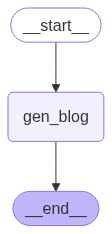

In [22]:
#gragh
graph = StateGraph(AIWritingAssistantState)

#nodes
graph.add_node('gen_blog', gen_blog)

#edges
graph.add_edge(START, 'gen_blog')
graph.add_edge('gen_blog', END)

#compile
workflow = graph.compile()
workflow


In [24]:
initial_state = {"topic": "AI in Pakistan"}
final_state = workflow.invoke(initial_state)

In [27]:
final_state['blog_post']

'**AI in Pakistan: Embracing the Future**\n\nArtificial Intelligence (AI) is revolutionizing industries around the world, and Pakistan is no exception. The country is experiencing a technological renaissance, with startups and educational institutions actively engaging in AI research and development. From healthcare to agriculture, the potential applications of AI are vast.\n\nIn healthcare, AI is helping doctors diagnose diseases more accurately and efficiently, which is crucial in a country with a growing population. For agriculture, AI-driven tools assist farmers in predicting crop yields and managing resources effectively, contributing to food security.\n\nMoreover, Pakistan’s vibrant youth population is fueling a surge in AI talent. Universities are incorporating AI courses into their curricula, fostering a new generation of innovators ready to tackle real-world challenges. Initiatives like the National AI Strategy are further propelling the country towards becoming a digital hub.